# Предварительный, корреляционный и регрессионный анализ неоднородных данных

## Цели

В ходе предварительного анализа данных с помощью графических и статистических результатов определить, является ли модель моделью «случайная выборка»; исследовать закон ее распределения и проверить присутствие аномальных наблюдений.

В ходе корреляционного анализа данных с помощью графических и статистических результатов исследовать зависимости между случайными величинами. В ходе регрессионного анализа данных с помощью графических и статистических результатов исследовать влияние одних случайных величин на другие.

Оценка влияния неоднородности выборки на вероятностные свойства данных: закон распределения, корреляционные и регрессионные зависимости.

Сравнительный анализ результатов для однородной и неоднородной выборок.

## Постановка задачи

Для данных Фишера:

1) Провести кластерный анализ данных;

2) Провести предварительный анализ данных;

3) Провести корреляционный анализ данных;

4) Провести регрессионный анализ данных.

*Указание*: использовать выборки значений переменной SEPALLEN для видов ирисов SETOSA, VERSICOLOR;

# Результаты исследований

## Подключение необходимых библиотек и загрузка данных

In [33]:
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, kurtosis, skew, gaussian_kde, kstest, ttest_ind, spearmanr
from statistics import correlation
import statsmodels.api as sm

Мы имеем следующую выборку: в первом столбце находится зависимая переменная, а в оставшихся трех --- независимые переменные.

In [30]:
dataset = datasets.load_iris()

ext_target = dataset.target[:, None]
df = pd.DataFrame(
    np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target]), axis=1),
    columns=dataset.feature_names + ['target label', 'target name'])
df = pd.concat([df.loc[df['target name'] == 'setosa'], df.loc[df['target name'] == 'versicolor']], axis=0)[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].astype(float)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


## Предварительный анализ

### Проверка нормальности распределения переменной SEPALLEN

Проверим гипотезу о том, что переменная SEPALLEN распределена номрально. Для проверки гипотезы о нормальности распределения построим гистограмму распределения.

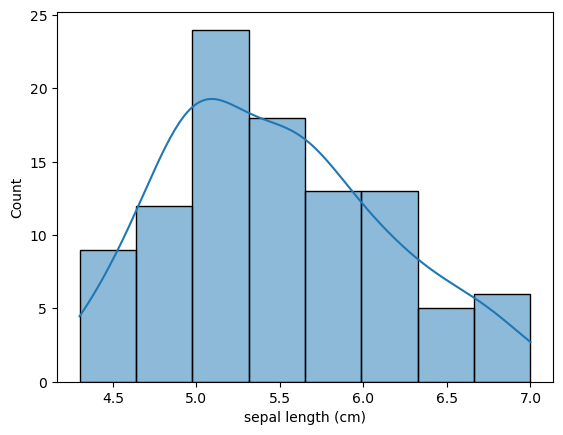

In [31]:
sns.histplot(data=df['sepal length (cm)'], kde=True)
None

Проанализируем построенную гистограмму:

•	гистограмма унимодальная;

•	на гистограмме присутствует неярко выраженная асимметрия;

•	“хвосты” гистограммы не выходят существенно за границы трёх сигм;

•	за пределами границ трёх сигм отсутствуют изолированные наблюдения (то есть нет аномальных наблюдений).

Таким образом, на данном этапе у нас нет причин отклонить гипотезу о нормальности распределения исследуемой случайной величины.

Проведем анализ дескриптивных статистик.

In [34]:
desc_stats = pd.DataFrame(pd.concat([df['sepal length (cm)'].describe(), 
                        pd.Series(data=df['sepal length (cm)'].median(), index=['median']), 
                        pd.Series(data=df['sepal length (cm)'].mode()[0], index=['mode']),
                        pd.Series(data=skew(df['sepal length (cm)'], bias=False), index=['skewness']), 
                        pd.Series(data=kurtosis(df['sepal length (cm)'], bias=False), index=['kurtosis']) ]), 
                        columns=['sepal length']).T
desc_stats

,count,mean,std,min,25%,50%,75%,max,median,mode,skewness,kurtosis
sepal length,100.0,5.471,0.641698,4.3,5.0,5.4,5.9,7.0,5.4,5.0,0.415353,-0.531483


Анализ показывает, что

•	среднее и медиана распределения выборки имеют близкие значения;

•	близко к нулю значения коэффициента асимметрии (skewness), причем значение положительно, поэтому выборка смещена влево;

•	близко к нулю значение коэффициента эксцесса (kurtosis), причем оно отрицательное, поэтому гистограмма имеет более пологую вершину;

•	выполняется правило трёх сигмовых границ, то есть большинство значений лежит в пределах трёх сигм влево и вправо;

Исследуем наличие аномальных наблюдений с помощью графика «ящик с усами». 

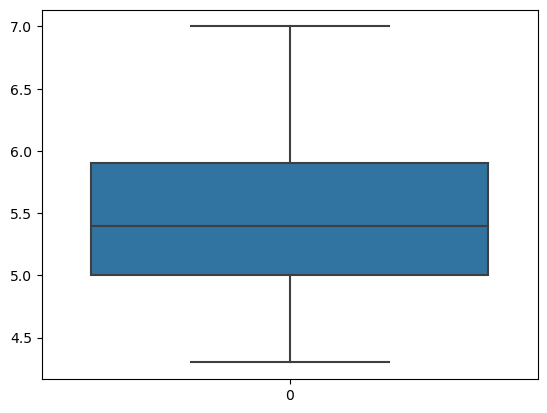

In [35]:
sns.boxplot(data=df['sepal length (cm)'])
None

На графике можно заметить положительную асимметрия в чем мы убедились ранее. На этом графике отсутствуют аномальные наблюдения, о чем говорит отсутствие значений за пределами “усов”. Параметры “ящика с усами” соответствуют нормальному распределению. Следовательно, мы всё так же не можем отклонить гипотезу о нормальности распределения.

Проведем проверку предположения о нормальности распределения, с помощью графика “квантиль-квантиль”.

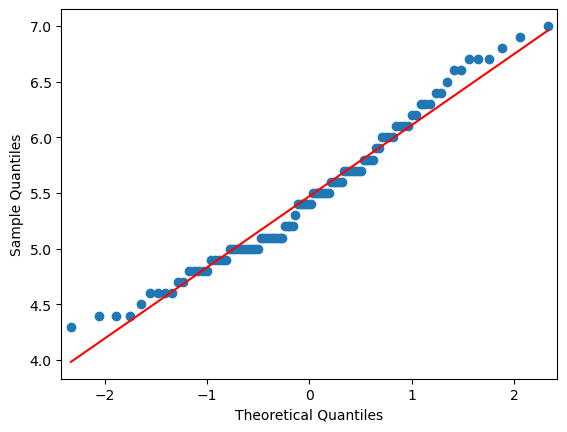

In [36]:
fig = sm.qqplot(df['sepal length (cm)'], line='s')
plt.show()

График показывает, что большая часть наблюдений в выборке близки к линии нормального распределения. На концах заметны несущественные отклонения. Однако они не позволяют нам отклонить гипотезу о нормальности распределения. 

В заключение для проверки выборки на нормальность используем критерий согласия Колмогорова-Смирнова.

In [43]:
expected = norm(loc=df['sepal length (cm)'].mean(), scale=df['sepal length (cm)'].std()).rvs(size=100)
ks_test = kstest(df['sepal length (cm)'], expected)
print('P=' + str(ks_test.pvalue))

P=0.07822115797841851


Критерий Колмогорова-Смирнова свидетельствует в пользу нормальности распределения данной случайной величины, т.к. P-значение больше 0.05. 

Таким образом, по совокупности признаков мы можем принять гипотезу о нормальности исследуемого распределения случайной величины SEPALLEN.

## Корреляционный анализ неоднородных данных

Выяснив, что переменная SEPALLEN распределена нормально, будем проводить корреляционный анализ линейной взаимосвязи зависимой переменной с независимыми для того, чтобы мы могли построить линейную модель для предсказания значений зависимой переменной. Целью корреляционного анализа является отыскание независимых переменных, имеющих ненулевую корреляцию с зависимой переменной.

Для того чтобы увидеть общую картину построим матрицу диаграмм рассеяния.

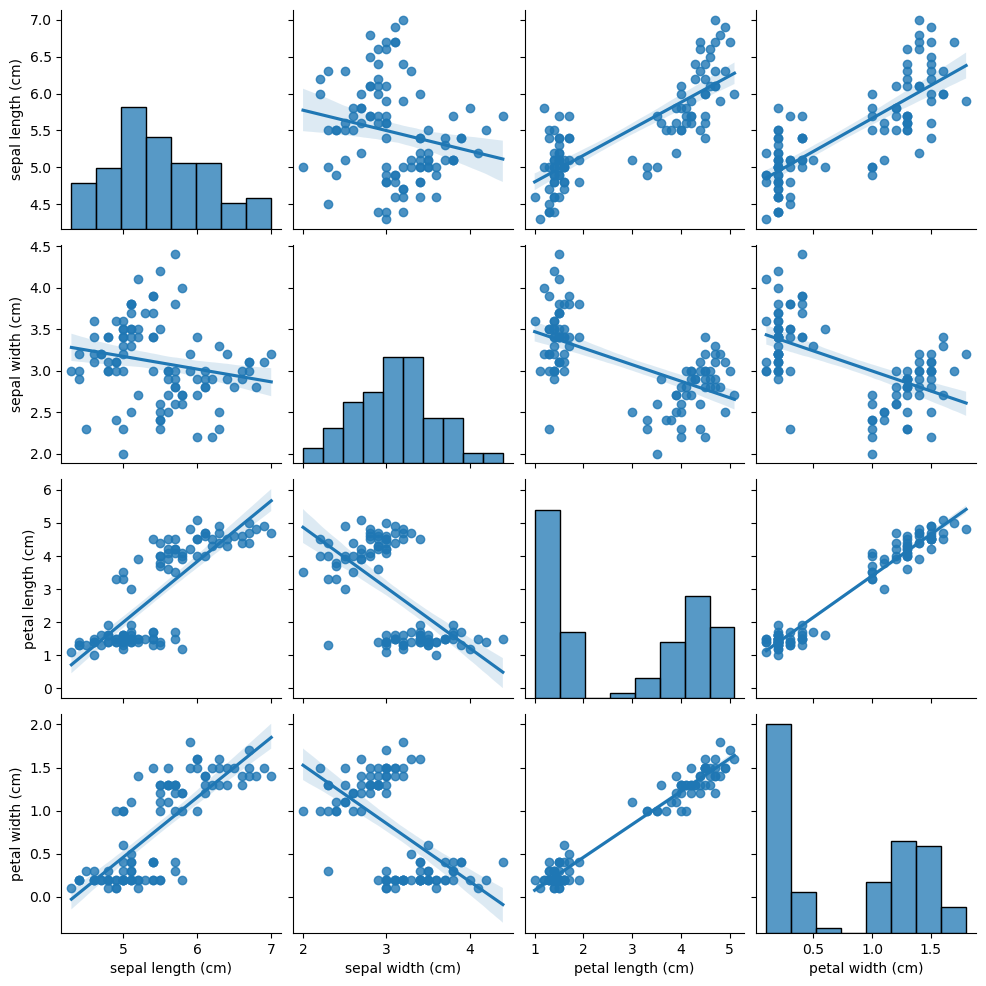

In [39]:
sns.pairplot(data=df, kind='reg', diag_kind='auto')
None

На графике хорошо просматривается корреляция между случайными величинами SEPALLEN с PETALLEN и PETALWID. Отчетливая связь между SEPALLEN и SEPALWID не прослеживается.

Для более точной характеристики проведем по-отдельности исследование корреляции между исследуемыми случайными величинами.

Для оценки коэффициента корреляции между случайными величинами мы будем пытаться использовать коэффциент корреляции Пирсона, а гипотезу о равенстве истинной корреляции нулю будем проверять с помощью критерия Стъюдента. Для того, чтобы применить это, нам необходимо выполнение следующих условий:

1. Исследуемые переменные X и Y должны быть распределены нормально;

2. Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений;

3. Количество значений в исследуемых переменных X и Y должно быть одинаковым.

Условия 2 и 3 очевидно выполняются. Поэтому для применения коэффициента Пирсона нам необходимо выполнение условия 1, то есть его проверку мы и будем проводить. Причем нам известно, что во всех случаях SEPALLEN распределена нормально. Поэтому при рассмотрении парной корреляции нам необходимо, чтобы вторая из рассматриваемых переменных была распределена нормально. Если же это не так, то мы будем использовать коэффициент корреляции Спирмена и соответственно гипотезу о равенстве истинной корреляции нулю будем проверять с помощью критерия Спирмена.

### Корреляция между SEPALLEN и SEPALWID

Для исследования корреляции между случайными величинами SEPALLEN и SEPALWID построим диаграмму рассеяния 

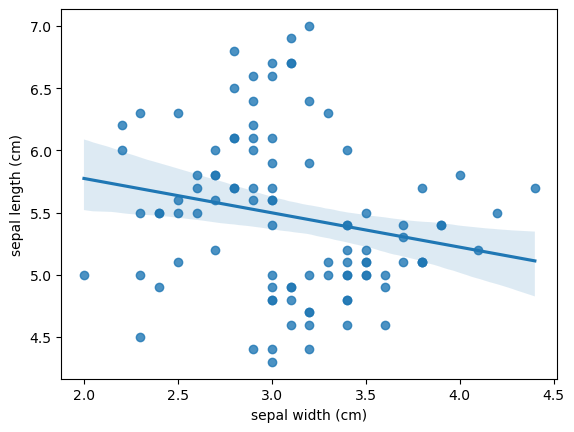

In [40]:
sns.regplot(
    x='sepal width (cm)', 
    y='sepal length (cm)', 
    data=df)
None

На графике не заметно четкой взаимосвязи между этими переменными. Проверим, является ли распределение переменной SEPALWID нормальным. Построим гистограмму распределения этой случайной величины.

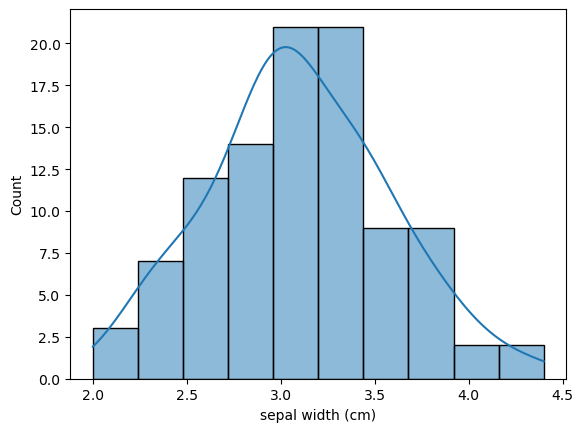

In [41]:
sns.histplot(data=df['sepal width (cm)'], kde=True)
None

Гистограмма распределения унимодальна, отсутствует ярко выраженная асимметрия. График ядерной оценки плотность схож с графиком нормального распределения, поэтому не отклоняем гипотезу о нормальности распределения.

Применим критерий Колмогорова-Смирнова.

In [44]:
expected = norm(loc=df['sepal width (cm)'].mean(), scale=df['sepal width (cm)'].std()).rvs(size=100)
ks_test = kstest(df['sepal width (cm)'], expected)
print('P=' + str(ks_test.pvalue))

P=0.7020569828664881


P$ > 0.05$, поэтому мы не отклоняем гипотезу о нормальности распределения. Рассмотрим гипотезу о равенстве нулю истинной корреляции между SEPALLEN и SEPALWID.
Для проверки этой гипотезу воспользуемся критерием Стъюдента. Оценим коэффициент корреляции по Пирсону.

In [46]:
ttest_result = ttest_ind(df['sepal length (cm)'], df['sepal width (cm)'])
print('P=' + str(ttest_result.pvalue))

corr = correlation(df['sepal length (cm)'], df['sepal width (cm)'])
print('corr=' + str(corr))

P=1.0601296072154299e-74
corr=-0.20592575599067017


Р$ <0.05$, поэтому отклоняем гипотезу и считаем рассматриваемый коэффициент парной корреляции по Пирсону $$corr (SEPALLEN, SEPALWID) = -0.2$$
Таким образом, у нас имеется отрицательная линейная взаимосвязь между переменными SEPALLEN и SEPALWID.

### Корреляция между SEPALLEN и PETALLEN

Для исследования корреляции между случайными величинами SEPALLEN и PETALLEN построим диаграмму рассеяния

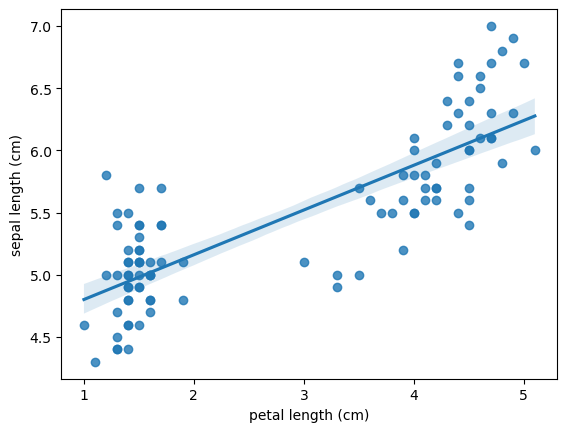

In [47]:
sns.regplot(
    x='petal length (cm)', 
    y='sepal length (cm)', 
    data=df)
None

На графике заметно, что при возрастании значения PETALLEN возрастает также и значение переменной SEPALLEN. Проверим, является ли распределение переменной PETALLEN нормальным. Построим гистограмму распределения этой случайной величины.

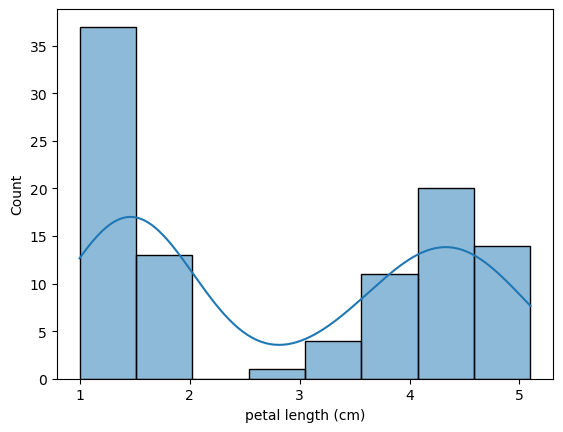

In [48]:
sns.histplot(data=df['petal length (cm)'], kde=True)
None

Гистограмма распределения бимодальна. Это происходит из-за наличия кластерной структуры в рассматрвиаемых данных. На данном этапе мы уже можем предполагать, что гипотеза будет отклонена.

Применим критерий Колмогорова-Смирнова.

In [55]:
expected = norm(loc=df['petal length (cm)'].mean(), scale=df['petal length (cm)'].std()).rvs(size=100)
ks_test = kstest(df['petal length (cm)'], expected)
print('P=' + str(ks_test.pvalue))

P=0.009878183186176536


P$ < 0.05$, поэтому мы отклоняем гипотезу о нормальности распределения. Рассмотрим гипотезу о равенстве нулю истинной корреляции между SEPALLEN и PETALLEN.
Для проверки этой гипотезу воспользуемся критерием Спирмена. Оценим коэффициент корреляции по Спирмену.

In [58]:
rho, p = spearmanr(df['sepal length (cm)'], df['petal length (cm)'])
print('P=' + str(p))
print('corr=' + str(rho))

P=5.150070177619456e-25
corr=0.8155428177870888


Р$ <0.05$, поэтому отклоняем гипотезу и считаем рассматриваемый коэффициент парной корреляции по Спирмену $$corr (SEPALLEN, PETALLEN) = 0.81$$
Таким образом, у нас имеется положительная линейная взаимосвязь между переменными SEPALLEN и PETALLEN.

### Корреляция между SEPALLEN и PETALWID

Для исследования корреляции между случайными величинами SEPALLEN и PETALWID построим диаграмму рассеяния

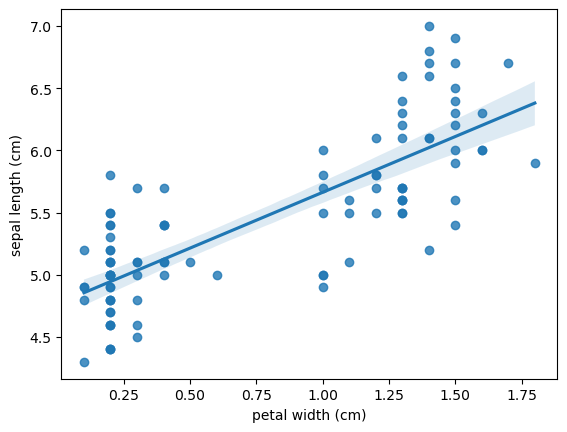

In [59]:
sns.regplot(
    x='petal width (cm)', 
    y='sepal length (cm)', 
    data=df)
None

На графике заметно, что при возрастании значения PETALWID возрастает также и значение переменной SEPALLEN. Проверим, является ли распределение переменной PETALWID нормальным. Построим гистограмму распределения этой случайной величины.

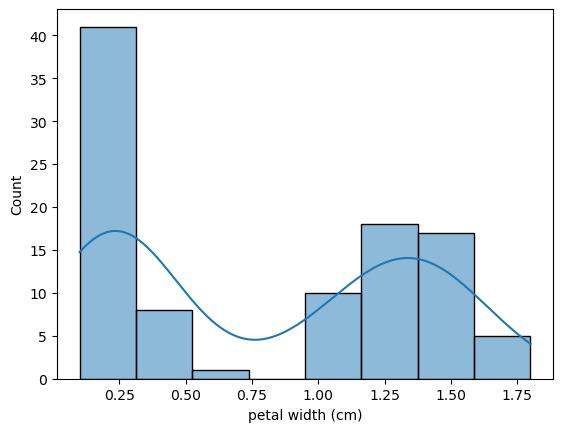

In [60]:
sns.histplot(data=df['petal width (cm)'], kde=True)
None

Гистограмма распределения бимодальна. Это происходит из-за наличия кластерной структуры в рассматрвиаемых данных. На данном этапе мы уже можем предполагать, что гипотеза будет отклонена.

Применим критерий Колмогорова-Смирнова.

In [63]:
expected = norm(loc=df['petal width (cm)'].mean(), scale=df['petal width (cm)'].std()).rvs(size=100)
ks_test = kstest(df['petal width (cm)'], expected)
print('P=' + str(ks_test.pvalue))

P=0.03638428787491733


P$ < 0.05$, поэтому мы отклоняем гипотезу о нормальности распределения. Рассмотрим гипотезу о равенстве нулю истинной корреляции между SEPALLEN и PETALWID.
Для проверки этой гипотезу воспользуемся критерием Спирмена. Оценим коэффициент корреляции по Спирмену.

In [64]:
rho, p = spearmanr(df['sepal length (cm)'], df['petal width (cm)'])
print('P=' + str(p))
print('corr=' + str(rho))

P=2.323971247046437e-23
corr=0.7988640567660528


Р$ <0.05$, поэтому отклоняем гипотезу и считаем рассматриваемый коэффициент парной корреляции по Спирмену $$corr (SEPALLEN, PETALLEN) = 0.79$$
Таким образом, у нас имеется положительная линейная взаимосвязь между переменными SEPALLEN и PETALWID.

## Регрессионный анализ неоднородных данных

Проведем регрессионный анализ влияния факторов SEPALWID, PETALLEN, PETALWID на поведение переменной SEPALLEN, чтобы построить регрессионную модель для предсказания поведения зависимой переменной SEPALLEN. Для проведения регрессионного анализа нам необходимо выполнение следующих условий:

1. Линейная зависимость переменных;

2. Нормальное распределение остатков;

3. Гетероскедастичность;

4. Проверка на мультиколлинеарность;

5. Нормальное распределение переменных;

Линейная зависимость и нормальное распределение переменных следует непосредственно из корреляционного анализа. Остатки мы исследуем после построения регрессионной модели.

Для повышения качества модели сперва исключим мультиколлинеарные факторы. Чтобы найти мультиколлинеарные факторы (независимые переменные с сильной корреляционной связью $(> 0.7)$) построим корреляционную матрицу.

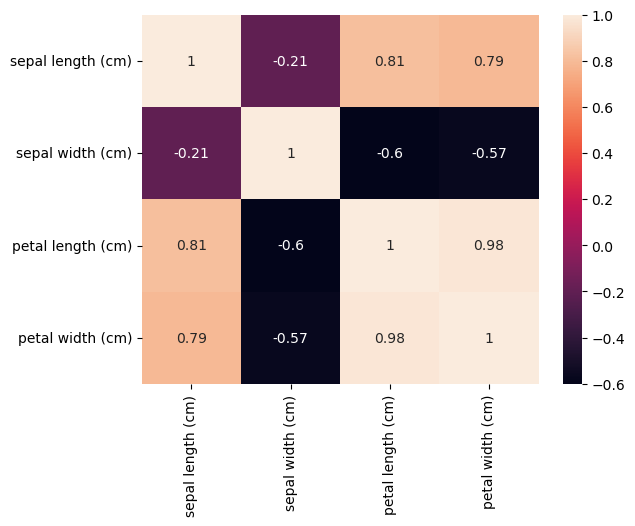

In [65]:
sns.heatmap(df.corr(), annot = True)
None

Среди нашей выборки присутствуют мультиколлинеарные факторы: PETALLEN и PETALWID. Нам необходимо исключить один из них при построении нашей модели.
Среди признаков PETALLEN и PETALWID мы исключим тот, Р-значение которого меньше при построении линейной модели.

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=df['sepal length (cm)']
X=df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     121.7
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           1.36e-32
Time:                        14:34:34   Log-Likelihood:                -18.561
No. Observations:                 100   AIC:                             45.12
Df Residuals:                      96   BIC:                             55.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.0707      0.316      6.549      0.000       1.443       2.698
sepal width (cm)      0.6120      0.079      7.767      0.000       0.456       0.768
petal length (cm)     0.6390      0.106      6.051      0.000       0.429       0.849
petal width (cm)     -0.4125      0.263     -1.567      0.120      -0.935       0.110
==============================================================================
Omnibus:                        1.805   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.380
Skew:                           0.063   Prob(JB):                        0.501
Kurtosis:                       2.438   Cond. No.                         54.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Р-значение PETALWID ниже, поэтому эту переменную исключим из выборки. Перестроим матрицу корреляции, чтобы проверить, нет ли мультиколлинеарности

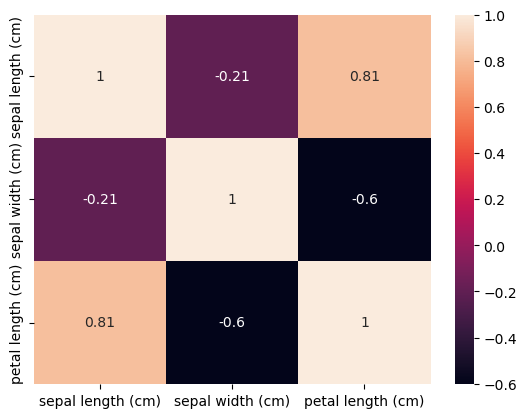

In [67]:
df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
sns.heatmap(df.corr(), annot = True)
None

Коллинеарных признаков нет, поэтому перестроим линейную модель:

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=df['sepal length (cm)']
X=df[['sepal width (cm)', 'petal length (cm)']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           3.00e-33
Time:                        14:36:01   Log-Likelihood:                -19.824
No. Observations:                 100   AIC:                             45.65
Df Residuals:                      97   BIC:                             53.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.2512      0.297      7.589      0.000       1.662       2.840
sepal width (cm)      0.5972      0.079      7.578      0.000       0.441       0.754
petal length (cm)     0.4785      0.026     18.386      0.000       0.427       0.530
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.747
Skew:                           0.055   Prob(JB):                        0.688
Kurtosis:                       2.591   Cond. No.                         45.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Отклоняем гипотезу о том, что какой-либо из коэффициентов линейной регрессии нулевой.
При составлении таблицы с уровнями значимости для коэффициентов регрессии была составлена таблица, из которой мы выясняем, что значение коэффициента детерминации в данном случае $R=0.786$, то есть примерно $78,6%$ изменчивости зависимой переменной объясняется построенной моделью. Также была вычислена F-статистика и соответствующее Р-значение для построенной модели. Это позволяет нам принять гипотезу о том, что наша модель в принципе позволяет нам объяснить поведение нашей зависимой переменной.

### Анализ остатков линейной модели

Для предварительного анализа качества модели и применимости регрессионного анализа проведем анализ остатков (разностей фактических значений отклика и значений, предсказанных по уравнению регрессии).

In [81]:
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
res = df['sepal length (cm)'] - y_pred

Вычислим остатки, отняв от реальных значений SEPALLEN значения, предсказанные нашей моделью. Проведем проверку распределения остатков на нормальность. Для этого построим гистограмму распределения остатков.

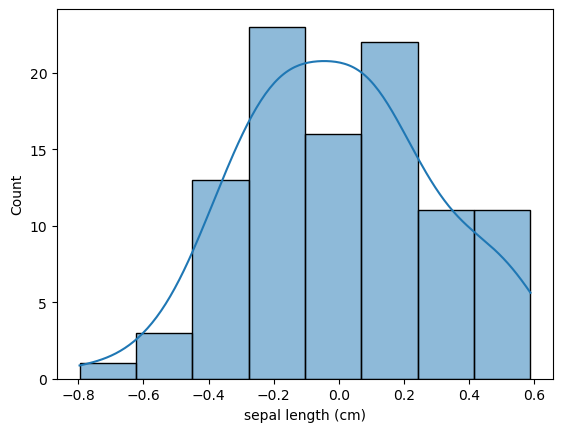

In [73]:
sns.histplot(data=res, kde=True)
None

Гистограмма унимодальна и на ней отсутствует ярко выраженная асимметрия, поэтому гипотеза о нормальности не отклоняется.

Для более полного изучения построим нормально-вероятностный график остатков.

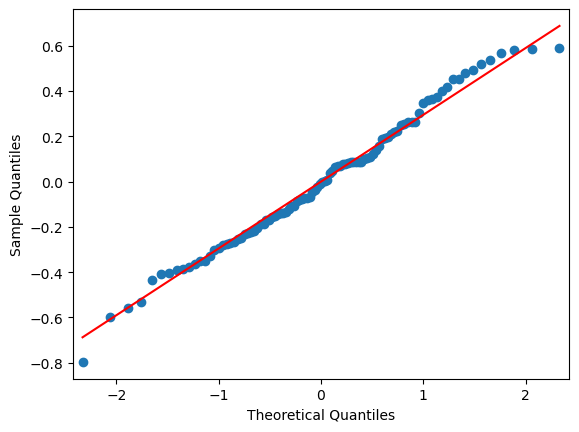

In [74]:
fig = sm.qqplot(res, line='s')
plt.show()

График показывает, что систематических отклонений фактических данных от теоретической нормальной прямой не наблюдается.
Гипотезу проверим по критерию Колмогорова-Смирнова.

In [75]:
expected = norm(loc=res.mean(), scale=res.std()).rvs(size=100)
ks_test = kstest(res, expected)
print('P=' + str(ks_test.pvalue))

P=0.8154147124661313


Р$<0.05$, поэтому принимаем гипотезу о том, что распределение остатков нормальное.

Проверим отсутствие зависимости остатков от предсказанных по уравнению регрессии значений отклика. Для этого построим диаграмму рассеяния предсказанных значений SEPALLEN от остатков.

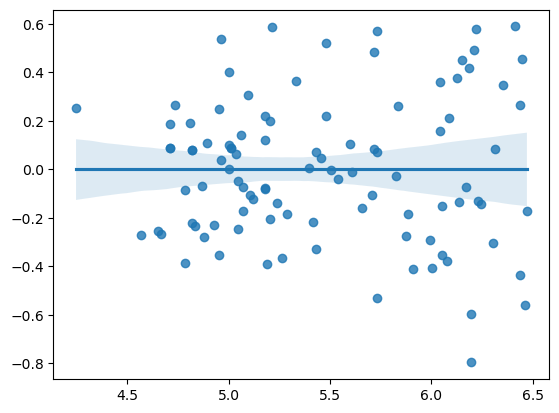

In [91]:
predicted_residuals = pd.concat([res, pd.Series(y_pred)], keys= ['res', 'y_pred'])
sns.regplot(
    x='y_pred', 
    y='res', 
    data=predicted_residuals)
None

На этом графике мы можем посмотреть на соотношение остатков и предсказанных значений. Нетрудно заметить, что точки не имеют системности в своем расположении. Соответственно, мы можем сказать, что остатки не зависят от предсказанных значений.

Оба условия выполнены. Следовательно, анализ остатков показал, что модель достаточно качественная. В заключение оценим приемлемость модели в целом с помощью двухфакторного дисперсионного анализа. В двухфакторном дисперсионном анализе мы проверяем гипотезу о равенстве средних сумм квадратов двух групп. Первая группа будет сформирована из предсказываемых нашей моделью значений, а вторая – на основе примитивного прогноза, что все значения SEPALLEN будут равны среднему.

In [93]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = df.rename(columns={'sepal length (cm)':'sepallen',
                                 'sepal width (cm)':'sepalwid',
                                 'petal length (cm)':'petallen'})

formula = 'sepallen ~ sepalwid + petallen + sepalwid:petallen'
model = ols(formula, data=df[['sepallen', 'sepalwid', 'petallen']].astype(float)).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
sepalwid,5.152918,1.0,58.714203,1.461052e-11
petallen,30.333294,1.0,345.628499,1.405897e-33
sepalwid:petallen,0.278691,1.0,3.175503,7.791199e-02
Residual,8.425220,96.0,NaN,NaN


P$<0.05$ во всех случаях. Поэтому мы отклоняем гипотезу о равенстве средних. Следовательно, наша модель может успешно применяться для предсказания переменной SEPALLEN с помощью переменных 